In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from pathlib import Path

In [65]:
def topk_accuracy(preds, targets, k):
    _, topk = preds[0].topk(k,1,True,True)    
    correct = 0.0
    
    for i in range(k):
        correct += sum((targets == topk[:,i:i+1]).double())
    
    
    accu = correct / topk.size(0)
    
    return accu.tolist()[0]

In [4]:
#path_img = Path('./dataset_20_images/train')
path_img = Path('../image-classify-celeb-face')

In [5]:
path_img.ls()

['train', 'test', 'valid']

fnames = []
for i in path_img.ls():
    fnames += get_image_files(path_img/i)

np.random.seed(2)
pat = r'/train/(.*)/'

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299,valid_pct=0.2)
data.normalize(imagenet_stats)

In [6]:
data = ImageDataBunch.from_folder(path_img, ds_tfms=get_transforms(), size=299)
data.normalize(imagenet_stats)

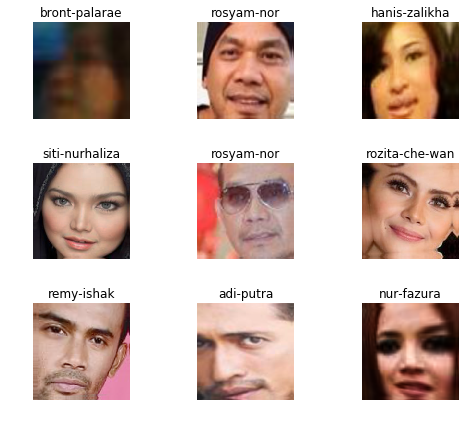

In [7]:
data.show_batch(rows=3, figsize=(7,6), is_train=True)

In [8]:
print(data.classes)
len(data.classes),data.c

['aaron-aziz', 'adi-putra', 'awal-ashaari', 'bront-palarae', 'elfira-roy', 'fahrin-ahmad', 'fasha-sandha', 'fattah-amin', 'hafidz-roshdi', 'hanis-zalikha', 'iqram-dinzly', 'lisa-surihani', 'neelofa', 'nora-danish', 'nur-fazura', 'remy-ishak', 'rosyam-nor', 'rozita-che-wan', 'scha-alyahya', 'siti-nurhaliza']


(20, 20)

In [9]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

In [10]:
learn.unfreeze()
learn.fit_one_cycle(5)

Total time: 03:23
epoch  train loss  valid loss  error_rate
1      3.283344    3.097412    0.870558    (01:14)
2      2.872196    2.801031    0.812183    (00:33)
3      2.511300    3.810774    0.779188    (00:32)
4      2.140820    2.134129    0.588832    (00:32)
5      1.823291    1.688320    0.505076    (00:31)



In [22]:
learn.lr_find()

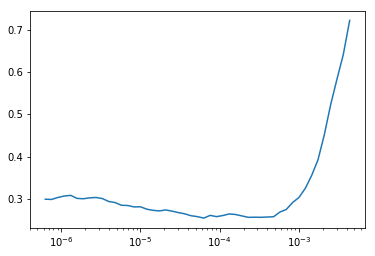

In [23]:
learn.recorder.plot()


In [33]:
learn.save('stage-1-50-face')

In [34]:
learn.load('stage-1-50-face')

In [32]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-7,1e-4))

Total time: 01:04
epoch  train loss  valid loss  error_rate
1      0.236269    1.342126    0.340102    (00:31)
2      0.229860    1.340440    0.342640    (00:32)



In [35]:
interp = ClassificationInterpretation.from_learner(learn)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


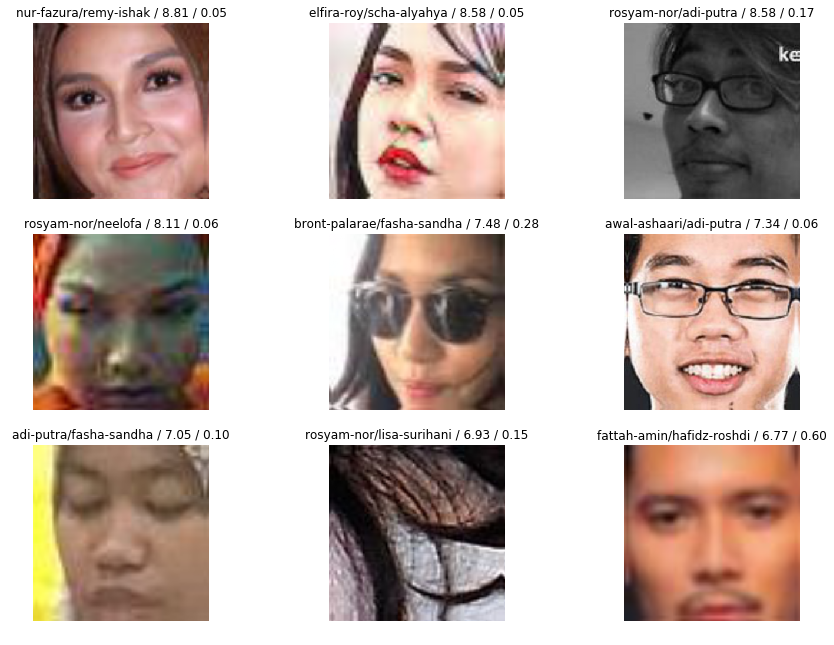

In [36]:
interp.plot_top_losses(9, figsize=(15,11))

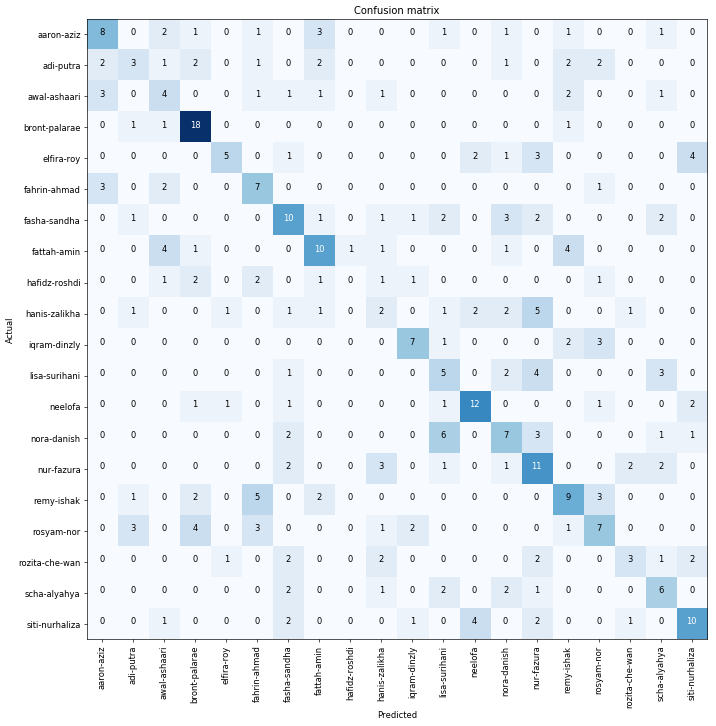

In [41]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)



In [70]:
interp.most_confused()

[('fasha-sandha', 'lisa-surihani', 5),
 ('fasha-sandha', 'nur-fazura', 5),
 ('siti-nurhaliza', 'lisa-surihani', 5),
 ('aaron-aziz', 'fattah-amin', 3),
 ('adi-putra', 'awal-ashaari', 3),
 ('adi-putra', 'rosyam-nor', 3),
 ('hanis-zalikha', 'lisa-surihani', 3),
 ('nur-fazura', 'fasha-sandha', 3),
 ('remy-ishak', 'adi-putra', 3),
 ('awal-ashaari', 'fattah-amin', 2),
 ('fasha-sandha', 'adi-putra', 2),
 ('fattah-amin', 'bront-palarae', 2),
 ('hafidz-roshdi', 'aaron-aziz', 2),
 ('hafidz-roshdi', 'fattah-amin', 2),
 ('hanis-zalikha', 'fattah-amin', 2),
 ('hanis-zalikha', 'neelofa', 2),
 ('iqram-dinzly', 'adi-putra', 2),
 ('nora-danish', 'scha-alyahya', 2),
 ('nur-fazura', 'adi-putra', 2),
 ('nur-fazura', 'hanis-zalikha', 2),
 ('remy-ishak', 'awal-ashaari', 2),
 ('remy-ishak', 'bront-palarae', 2),
 ('remy-ishak', 'fattah-amin', 2),
 ('rosyam-nor', 'bront-palarae', 2),
 ('rosyam-nor', 'fahrin-ahmad', 2),
 ('siti-nurhaliza', 'nur-fazura', 2)]

In [47]:
preds = learn.get_preds()

targets = torch.from_numpy(data.valid_ds.ds.y.reshape(-1,1))


torch.Size([394, 1])

In [68]:
topk_accuracy(preds,targets,5)

0.883248730964467

# Utils

In [22]:
import face_recognition


In [24]:
ts_img = path_img/'train/fahrin-ahmad/fahrin-ahmad 54. fahrin-1.jpg'

In [42]:
image = face_recognition.load_image_file(ts_img)
face_locations = face_recognition.face_locations(image, model="cnn")

In [43]:
from PIL import Image as PImage


for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = PImage.fromarray(face_image)

A face is located at pixel location Top: 47, Left: 86, Bottom: 129, Right: 168


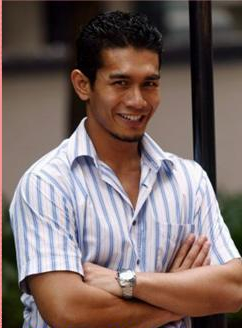

In [44]:
open_image(ts_img)

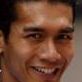

In [45]:
pil_image.save